# Worksheet 7 & 8

## Karan Trehan
### 18BCS6033
### 18AITAIML1 - Group B

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Importing the Required Libraries

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and Understanding the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
# Reading the csv file and putting it into 'train' object.
train = pd.read_csv('Training_set.csv')
valid = pd.read_csv('Validation_set.csv')

In [4]:
# Let's understand the type of values in each column of our dataframe 'train'.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute 1 (a1)  30 non-null     int64
 1   Attribute 2 (a2)  30 non-null     int64
 2   Class Label       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [5]:
# Let's understand the type of values in each column of our dataframe 'valid'.
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Attribute 1 (a1)                               4 non-null      int64  
 1   Attribute 2 (a2)                               4 non-null      int64  
 2   True Class Label                               4 non-null      int64  
 3   Class Label as predicted by the decision tree  4 non-null      int64  
 4   Unnamed: 4                                     0 non-null      float64
 5   Unnamed: 5                                     0 non-null      float64
 6   Unnamed: 6                                     0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 352.0 bytes


In [6]:
# Let's understand the data, how it look like.
train.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [7]:
# Let's understand the data, how it look like.
valid.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [8]:
valid = valid.iloc[:,:4]
valid.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree
0,2,35,1,1
1,12,13,2,1
2,-4,45,2,2
3,2,17,2,2


## Checking for Missing and Duplicated Values

In [9]:
#Checking for duplicacy in the DataFrame using '.duplicated()' method and then checking the number of rows using
# '.shape[0]'
print("Number of Duplicate Rows in the Training DataFrame:" , train[train.duplicated()].shape[0])
print("Number of Duplicate Rows in the Validation DataFrame:" , valid[valid.duplicated()].shape[0])

Number of Duplicate Rows in the Training DataFrame: 0
Number of Duplicate Rows in the Validation DataFrame: 0


In [10]:
#Checking the Percentage of Columns having Missing Values in both the DataFrames
print('-+-'*10)
print(round(train.isnull().sum()/len(train)*100,2))
print('-+-'*18)
print(round(valid.isnull().sum()/len(valid)*100,2))
print('-+-'*18)

-+--+--+--+--+--+--+--+--+--+-
Attribute 1 (a1)    0.0
Attribute 2 (a2)    0.0
Class Label         0.0
dtype: float64
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Attribute 1 (a1)                                 0.0
Attribute 2 (a2)                                 0.0
True Class Label                                 0.0
Class Label as predicted by the decision tree    0.0
dtype: float64
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


* Explicitly checking the Missing Value Count.
* Inferring again that there are no Missing Values

## Data Visualization

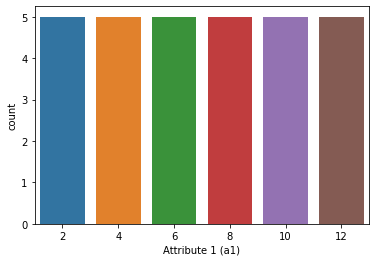

In [11]:
sns.countplot(train['Attribute 1 (a1)'])

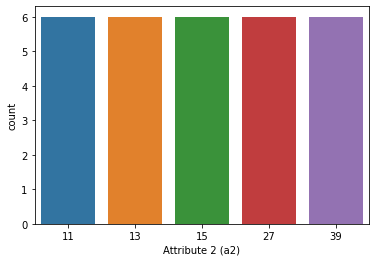

In [12]:
sns.countplot(train['Attribute 2 (a2)'])

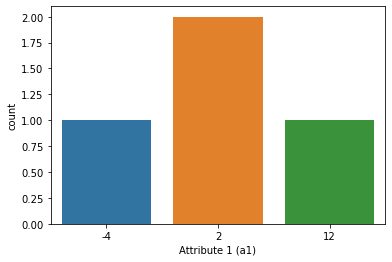

In [13]:
sns.countplot(valid['Attribute 1 (a1)'])

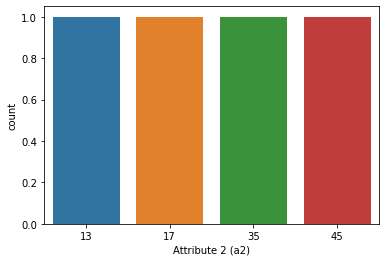

In [14]:
sns.countplot(valid['Attribute 2 (a2)'])

## Separating the Features and the Label columns

In [15]:
# Putting feature variable to X
X_train = train.drop('Class Label',axis=1)

# Putting response variable to y
y_train = train['Class Label']

In [16]:
# Putting feature variable to X
X_valid = valid.iloc[:,:2]

# Putting response variable to y
y_valid = valid['True Class Label']

## Fitting a Decision Tree Classifier Model

Use the following hyperparameters to solve the following questions:

* max_depth = 20
* min_samples_split = 10
* min_samples_leaf = 5
* Homogeneity measure = gini 

In [17]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
# model with optimal hyperparameters
dtc = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=20,
                                  min_samples_leaf=5,
                                  min_samples_split=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       random_state=100)

## Evaluating the Model

In [18]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dtc.predict(X_valid)

# Printing classification report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [19]:
# Confusion matrix and accuracy
print(confusion_matrix(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[0 1]
 [2 1]]
0.25


## Visualizing the Decision Tree

In [20]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(train.columns[:2])
features

['Attribute 1 (a1)', 'Attribute 2 (a2)']

In [21]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

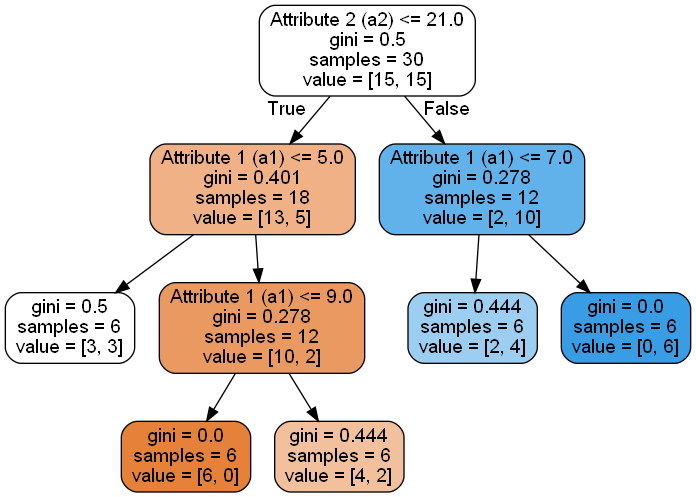

In [22]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

*Thank you!*